*Step 0 : Import And Read The Data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

from scipy import stats

import re
import warnings
warnings.filterwarnings('ignore')

In [117]:
data = pd.read_csv('RealEstateAU_1000_Samples.csv')
df= pd.DataFrame(data)
df.head(5)

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,0411724000,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,0418885966,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05


*Step 1: Data Understanding
.shape , .head() , .tail() , .columns

In [118]:
df.shape

(1000, 27)

In [119]:
df.columns

Index(['index', 'TID', 'breadcrumb', 'category_name', 'property_type',
       'building_size', 'land_size', 'preferred_size', 'open_date',
       'listing_agency', 'price', 'location_number', 'location_type',
       'location_name', 'address', 'address_1', 'city', 'state', 'zip_code',
       'phone', 'latitude', 'longitude', 'product_depth', 'bedroom_count',
       'bathroom_count', 'parking_count', 'RunDate'],
      dtype='object')

*Step 2: Data Preparation
- Drop irrelevant columns
- Identify and Drop rows with missing values
- Change the DataType for price column

In [120]:
#Dropping irrelevant columns
df=df[[#'index', 'TID', 'breadcrumb','category_name', 
    'property_type',
       #'building_size', 'land_size', 'preferred_size', 'open_date',
       'listing_agency', 'price', 'location_number', #'location_type',
       'location_name', 
        #'address', 'address_1', 
        'city', 'state', 'zip_code',
        #'phone', 
       'latitude', 'longitude', 'product_depth', 'bedroom_count',
       'bathroom_count', 'parking_count', 'RunDate']]
df.head()

,property_type,listing_agency,price,location_number,location_name,city,state,zip_code,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,House,Professionals - DARWIN CITY,"$435,000",139468611,"$435,000",Darwin City,NT,800,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755,"Offers Over $320,000",Darwin City,NT,800,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,Unit,Habitat Real Estate - THE GARDENS,"$310,000",139462495,"$310,000",Darwin City,NT,800,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,House,Ray White - NIGHTCLIFF,"$259,000",139451679,"$259,000",Darwin City,NT,800,NaN,NaN,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,Unit,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,"$439,000",Darwin City,NT,800,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05


In [121]:
#Checking Missing Values
df.isna().sum()

property_type         0
listing_agency        0
price                 0
location_number       0
location_name         0
city                  0
state                 0
zip_code              0
latitude           1000
longitude          1000
product_depth         0
bedroom_count        33
bathroom_count       33
parking_count        33
RunDate               0
dtype: int64

- step   : Check the number of missing values(NaaN)in each columns using .isna().sum()
- result : We indentified that latitude and longitude columns have the maximum mising values. 
- action : Drop latitude and longitude columns

In [122]:
#Dropping latitude and longitude columns
df_1= df.drop(['latitude','longitude'], axis=1)
df_1.isna().sum()

property_type       0
listing_agency      0
price               0
location_number     0
location_name       0
city                0
state               0
zip_code            0
product_depth       0
bedroom_count      33
bathroom_count     33
parking_count      33
RunDate             0
dtype: int64

In [123]:
#Finding pairs of columns with more than 90% similarity
duplicate_columns =[]
threshold = 0.9* len(df_1)

for col_1 in df_1.columns:
    for col_2 in df_1.columns:
        if col_1 != col_2 and (col_2 ,col_1 ) not in duplicate_columns:
            similarity_count = (df_1[col_1] == df_1[col_2]).sum()
            if similarity_count > threshold:
                duplicate_columns.append((col_1 ,col_2 ))

duplicate_columns                 

[('price', 'location_name')]

- Step   : Identify columns with more than 90% similarity, which can be a sign of data duplication. That will help in detecting redundancy and making subsewuent analyses more efficient and interpretable.
- Result : price & location_name columns have more than 90% of similarity. This finding is surpricing as price and location name are not typlically expected to be similar.
- Action : Dropping location_name column to eliminate redundancy in dataset.

In [124]:
#Droppoing location_name column
df_2 = df_1.drop(columns=['location_name'])
df_2.columns

Index(['property_type', 'listing_agency', 'price', 'location_number', 'city',
       'state', 'zip_code', 'product_depth', 'bedroom_count', 'bathroom_count',
       'parking_count', 'RunDate'],
      dtype='object')

In [125]:
#Check if all the values in each column are the same

columns_with_same_values = []

for col in df_2.columns:
    first_value = df_2[col].loc[0]
    
    if df_2[col].eq(first_value).all():
        columns_with_same_values.append(col)

columns_with_same_values

['state', 'RunDate']

- Step   : Check if all values in each columns are the same.
- Result : state & RunDate columns have the same values in each rows. Constant columns don't contribute to statistical analysis or models, as they don't provide any variation in observation.
- Action : Drop state & RunDate columns

In [126]:
#Drop state & RunDate columns
df_3 = df_2.drop(columns=['state', 'RunDate'])
df_3.columns

Index(['property_type', 'listing_agency', 'price', 'location_number', 'city',
       'zip_code', 'product_depth', 'bedroom_count', 'bathroom_count',
       'parking_count'],
      dtype='object')

In [127]:
df_3.isna().sum()

property_type       0
listing_agency      0
price               0
location_number     0
city                0
zip_code            0
product_depth       0
bedroom_count      33
bathroom_count     33
parking_count      33
dtype: int64

In [128]:
df_3.shape

(1000, 10)

- Step : Check for any further Missing values : 
- Result :bedroom_count, bathroom_count and parking_count have 33 missing values
- Action : Drop missing values 

In [129]:
df_4 = df_3.dropna()
df_4.isna().sum()

property_type      0
listing_agency     0
price              0
location_number    0
city               0
zip_code           0
product_depth      0
bedroom_count      0
bathroom_count     0
parking_count      0
dtype: int64

In [130]:
df_4

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,"$435,000",139468611,Darwin City,800,premiere,2.0,1.0,1.0
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755,Darwin City,800,premiere,3.0,2.0,2.0
2,Unit,Habitat Real Estate - THE GARDENS,"$310,000",139462495,Darwin City,800,premiere,2.0,1.0,1.0
3,House,Ray White - NIGHTCLIFF,"$259,000",139451679,Darwin City,800,premiere,1.0,1.0,0.0
4,Unit,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,Darwin City,800,premiere,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
995,House,United Realty NT - Parap,2 Residence,138346247,Virginia,834,feature,4.0,3.0,6.0
996,House,Kassiou Constructions - HOWARD SPRINGS,"$601,000",138333062,Humpty Doo,836,standard,4.0,2.0,2.0
997,House,Kassiou Constructions - HOWARD SPRINGS,"$655,000",138333058,Humpty Doo,836,standard,4.0,2.0,2.0
998,House,Kassiou Constructions - HOWARD SPRINGS,"$675,000",138333050,Lee Point,810,standard,4.0,2.0,3.0


In [131]:
#Extract Price from the text (ex :Offers Over $320,000 )
def extract_price(price_text):
    
    #Using regex to find a pattern that matches the price and ignores any following text
    price_match = re.search(r'\$[\d, ]*(?:\.\d{2})?' , str(price_text))
    
    if price_match:
        
        #remove spaces from the captured price and return
        return price_match.group(0).replace('','').replace('','')
    else:
        return None

#Applying the function to the price column in dataset
df_4['price'] = df_4['price'].apply(extract_price)

df_4.head()

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,"$435,000",139468611,Darwin City,800,premiere,2.0,1.0,1.0
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,"$320,000",139463755,Darwin City,800,premiere,3.0,2.0,2.0
2,Unit,Habitat Real Estate - THE GARDENS,"$310,000",139462495,Darwin City,800,premiere,2.0,1.0,1.0
3,House,Ray White - NIGHTCLIFF,"$259,000",139451679,Darwin City,800,premiere,1.0,1.0,0.0
4,Unit,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,Darwin City,800,premiere,3.0,2.0,2.0


- Step : Remove aditional text from the price value ( ex.Offers Over $320,000) . Design a function to Return the price value in $100,000 format
- Result : The function uses a redular expression(regex) to extract the numeric price value, including the $ symbol.
- Action : Transformed the price values into a consistent formate that can be used for numerical analysis.

In [132]:
df_4.isna().sum()

property_type        0
listing_agency       0
price              223
location_number      0
city                 0
zip_code             0
product_depth        0
bedroom_count        0
bathroom_count       0
parking_count        0
dtype: int64

In [133]:
df_5 = df_4.dropna()
df_5.isna().sum()

property_type      0
listing_agency     0
price              0
location_number    0
city               0
zip_code           0
product_depth      0
bedroom_count      0
bathroom_count     0
parking_count      0
dtype: int64

In [134]:
df_5.head(2)

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,"$435,000",139468611,Darwin City,800,premiere,2.0,1.0,1.0
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,"$320,000",139463755,Darwin City,800,premiere,3.0,2.0,2.0


In [135]:
#Remove currency symbol and 
# convert price column into a integer datatype
df_5_copy = df_5.copy()

df_5_copy['price'] = df_5_copy['price'].replace('[\$, .]', '' , regex=True).astype(int)
df_6 = df_5_copy
df_6 = df_6.reset_index(drop=True)
df_6

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,435000,139468611,Darwin City,800,premiere,2.0,1.0,1.0
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,320000,139463755,Darwin City,800,premiere,3.0,2.0,2.0
2,Unit,Habitat Real Estate - THE GARDENS,310000,139462495,Darwin City,800,premiere,2.0,1.0,1.0
3,House,Ray White - NIGHTCLIFF,259000,139451679,Darwin City,800,premiere,1.0,1.0,0.0
4,Unit,Carol Need Real Estate - Fannie Bay,439000,139433803,Darwin City,800,premiere,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
739,House,Real Estate Central - DARWIN CITY,495000,138350855,Woodroffe,830,feature,4.0,2.0,2.0
740,House,Kassiou Constructions - HOWARD SPRINGS,601000,138333062,Humpty Doo,836,standard,4.0,2.0,2.0
741,House,Kassiou Constructions - HOWARD SPRINGS,655000,138333058,Humpty Doo,836,standard,4.0,2.0,2.0
742,House,Kassiou Constructions - HOWARD SPRINGS,675000,138333050,Lee Point,810,standard,4.0,2.0,3.0


In [136]:
df_6.dtypes

property_type       object
listing_agency      object
price                int32
location_number      int64
city                object
zip_code             int64
product_depth       object
bedroom_count      float64
bathroom_count     float64
parking_count      float64
dtype: object

In [137]:
#Cehck if the DataSet contains any Negative values # Select only numeric columns from above
negative_count = df_6[['price','location_number','zip_code','bedroom_count','bathroom_count','parking_count' ]]\
                        .apply(lambda x: (x<0).sum())
negative_count

price              0
location_number    0
zip_code           0
bedroom_count      0
bathroom_count     0
parking_count      0
dtype: int64

- Step   : Cehck if there are any Negetive values in the specified numeric columns. As -ve values i nthe dataset might not be logical sense. By removing -ve values , tt helps to identify potential error or inconsistences in the data.

- Result : There is not -ve values in the dataset.

In [138]:
cleaned_df = df_6
cleaned_df

,property_type,listing_agency,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,House,Professionals - DARWIN CITY,435000,139468611,Darwin City,800,premiere,2.0,1.0,1.0
1,Apartment,Nick Mousellis Real Estate - Eview Group Member,320000,139463755,Darwin City,800,premiere,3.0,2.0,2.0
2,Unit,Habitat Real Estate - THE GARDENS,310000,139462495,Darwin City,800,premiere,2.0,1.0,1.0
3,House,Ray White - NIGHTCLIFF,259000,139451679,Darwin City,800,premiere,1.0,1.0,0.0
4,Unit,Carol Need Real Estate - Fannie Bay,439000,139433803,Darwin City,800,premiere,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
739,House,Real Estate Central - DARWIN CITY,495000,138350855,Woodroffe,830,feature,4.0,2.0,2.0
740,House,Kassiou Constructions - HOWARD SPRINGS,601000,138333062,Humpty Doo,836,standard,4.0,2.0,2.0
741,House,Kassiou Constructions - HOWARD SPRINGS,655000,138333058,Humpty Doo,836,standard,4.0,2.0,2.0
742,House,Kassiou Constructions - HOWARD SPRINGS,675000,138333050,Lee Point,810,standard,4.0,2.0,3.0


The dataset is cleaned and ready for analysis and exploration.

*Step 3: Feature Understanding
- Plotting feature distribution
- Histogram, KDE, Boxplot

In [139]:
round(cleaned_df.describe(),2)

,price,location_number,zip_code,bedroom_count,bathroom_count,parking_count
count,744.00,7.440000e+02,744.00,744.00,744.00,744.00
mean,574842.46,1.414840e+08,816.29,2.77,1.70,2.09
std,1431358.55,4.138846e+07,13.63,1.09,0.61,1.51
min,1.00,1.085305e+08,800.00,0.00,1.00,0.00
25%,380000.00,1.386080e+08,800.00,2.00,1.00,1.00
50%,489000.00,1.389919e+08,812.00,3.00,2.00,2.00
75%,610000.00,1.392743e+08,830.00,3.00,2.00,2.00
max,38900000.00,7.001996e+08,839.00,8.00,5.00,12.00


In [ ]:
#For learning.. To drop one perticular record
#i = cleaned_df[cleaned_df['price']==1].index
#cleaned_df_1 = cleaned_df.drop(i)

In [148]:
filtered_df =cleaned_df[cleaned_df['price'] >10000]
round(filtered_df.describe(),2)

,price,location_number,zip_code,bedroom_count,bathroom_count,parking_count
count,736.00,7.360000e+02,736.00,736.00,736.00,736.00
mean,581085.26,1.415119e+08,816.22,2.76,1.69,2.07
std,1437865.65,4.161221e+07,13.67,1.09,0.60,1.47
min,99950.00,1.085305e+08,800.00,0.00,1.00,0.00
25%,383750.00,1.386080e+08,800.00,2.00,1.00,1.00
50%,490000.00,1.389919e+08,812.00,3.00,2.00,2.00
75%,612725.00,1.392750e+08,830.00,3.00,2.00,2.00
max,38900000.00,7.001996e+08,839.00,8.00,5.00,12.00


*1. Price Statistics:
-Price Range: The minimum price is AUD 99,950  , maximum price is 38900000.00


##Property Dsstribution
-Which property type has the highest demand in the market.

Hypothesis Test Question:
null Hypothesis        : Apartments are more expensive than the unit.
Alternative hypothesis : Apartments are not expensive than the unit.

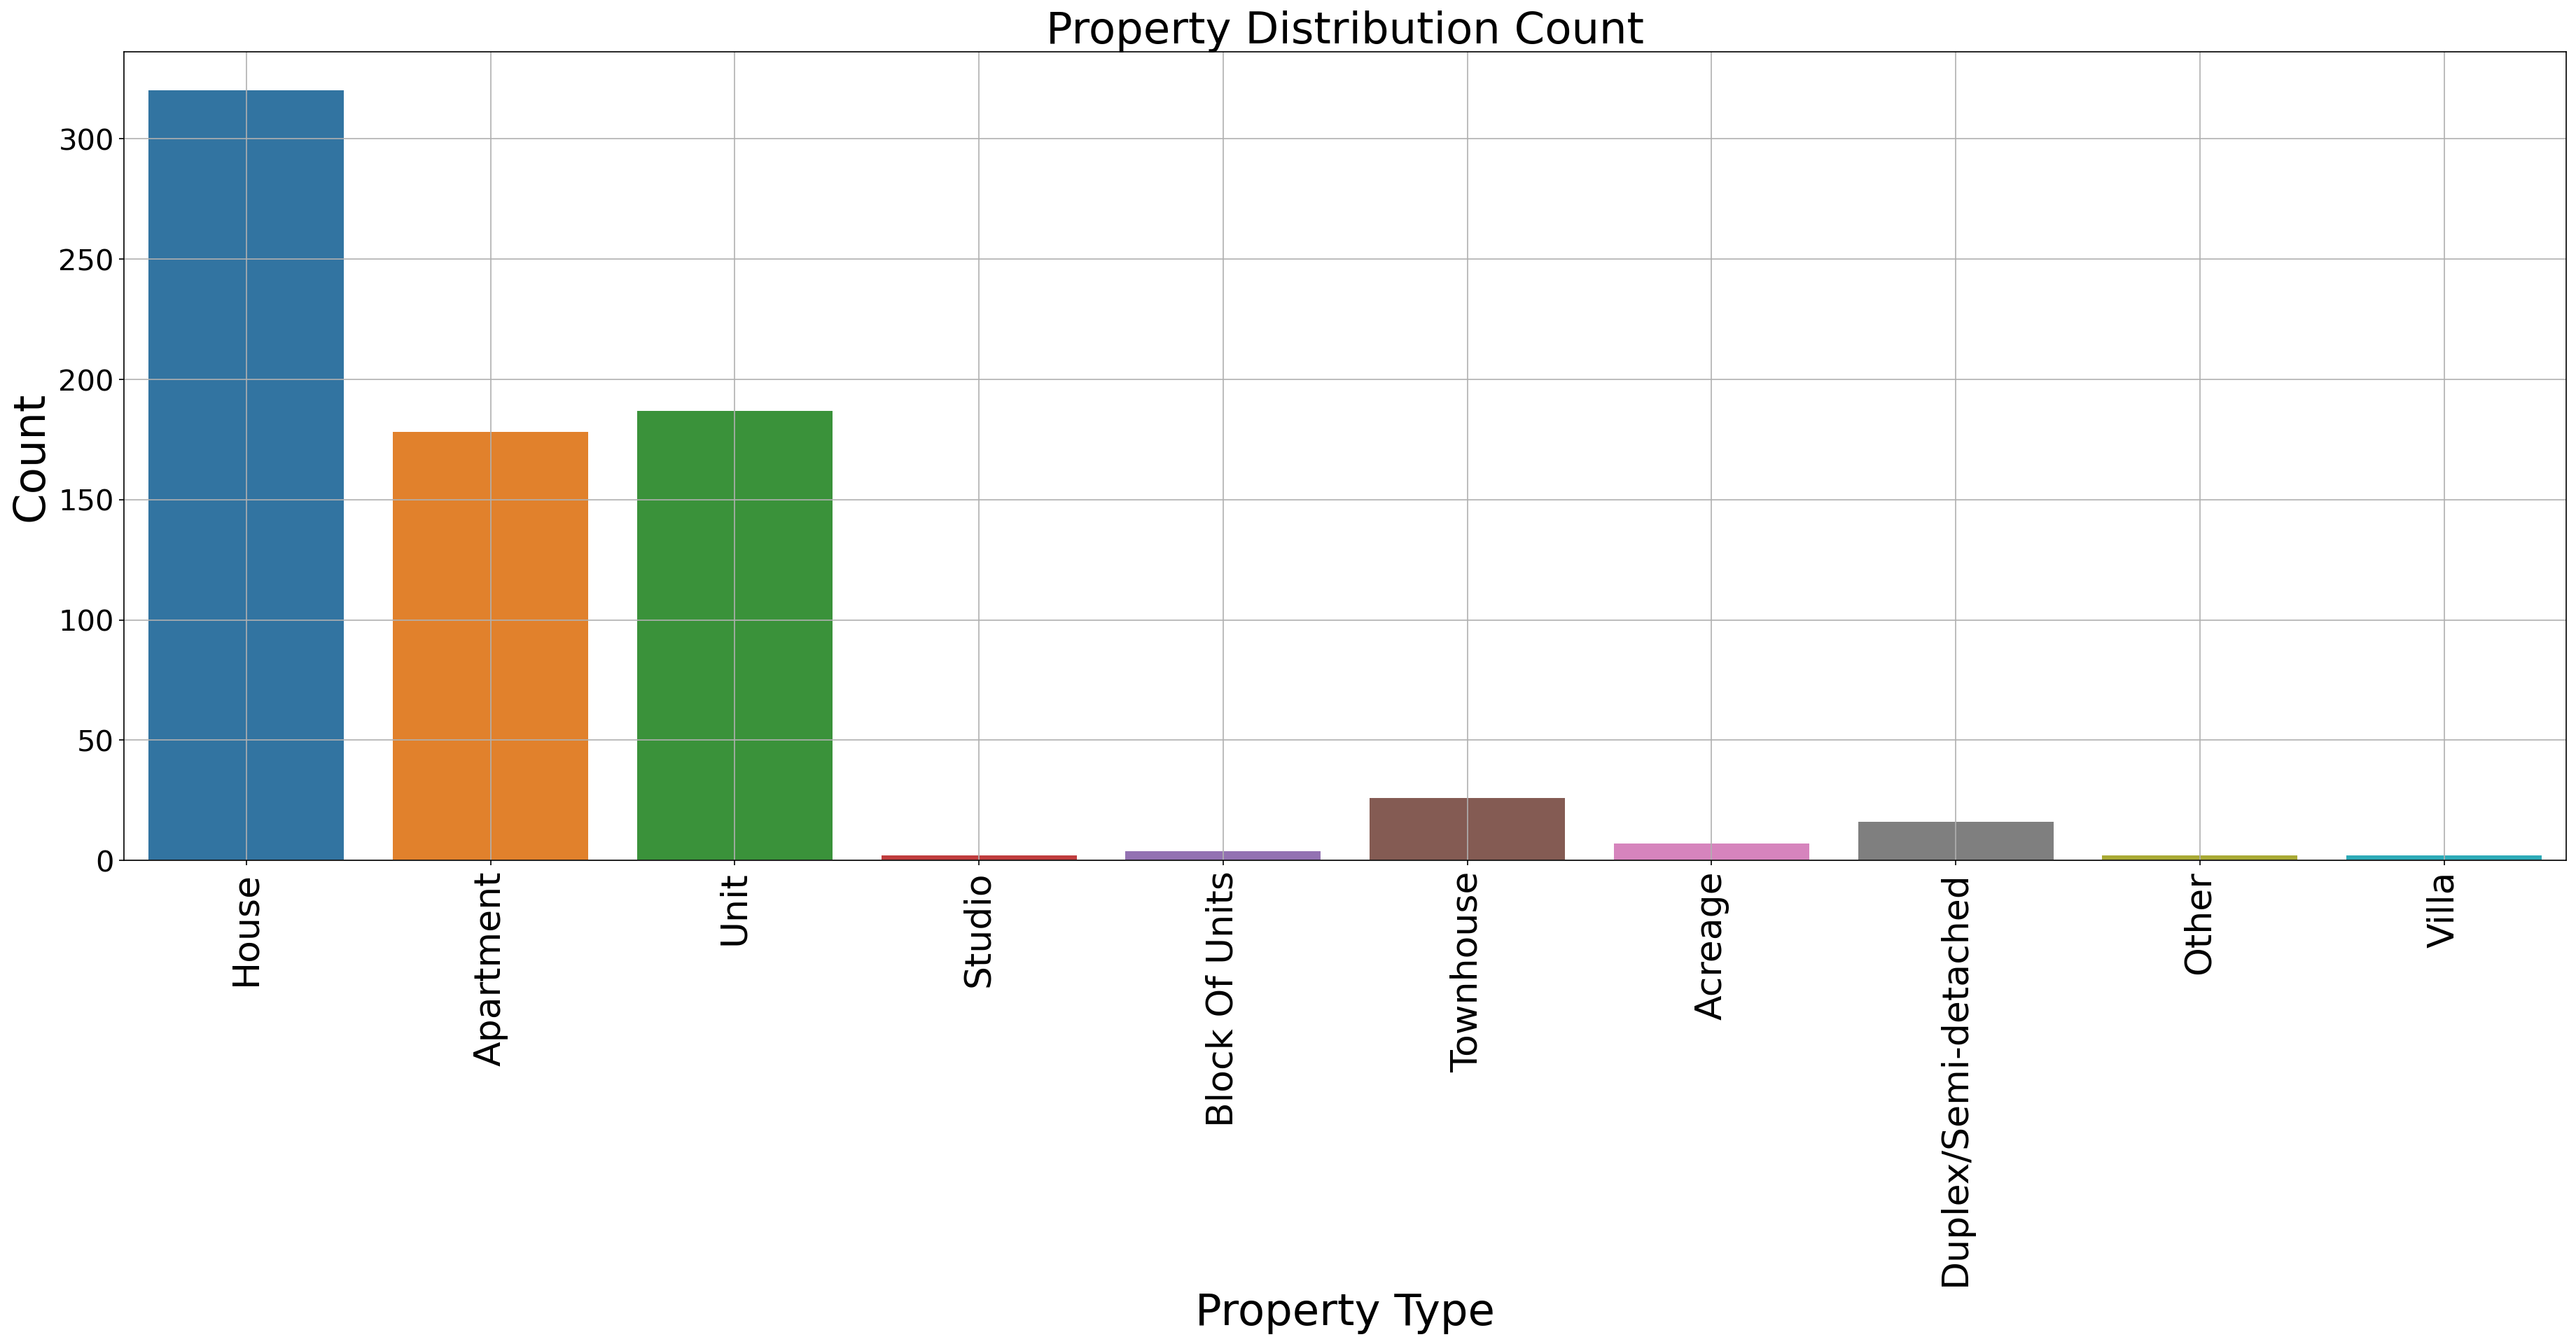

NormaltestResult(statistic=11.618158854652956, pvalue=0.0030001906950231573)


In [147]:
plt.figure(figsize=(30,10),dpi=150)

ax = sns.countplot(x='property_type' , data=cleaned_df)

plt.title('Property Distribution Count' ,fontsize = 30)
plt.xlabel('Property Type' , fontsize = 30)
plt.xticks(rotation=90, fontsize = 25)

plt.ylabel('Count' , fontsize=30)
plt.yticks(fontsize = 20)

plt.grid()
plt.show()
print(stats.normaltest(cleaned_df['price'].sample(50)))

*Observation
-House is the most common property type , with a count exceeding 300.
-Apartment and Units have the similar counts ,sligtly below 200.
-Townhouse has the notable count but significuntly less than house,apartment and unit.
-other property types Studio, Acreage, Duplex/Semi-detached, Other, Villa has a very low count with villa being the least common.
-House dominate the market, indicating a higher availability of prefrences for this property types.

The p-value of 0.003 is much lower than the common alpha level of 0.05. This means we reject the null hypothesis that the Apartment are more expensive than the Unit.

#Price Distribution
Hypothesis questiion : How is the property price distribution looks like?
null hypothesis        : property prices are normally distributed.
alternative hypothesis : property prices are not normally distributed.

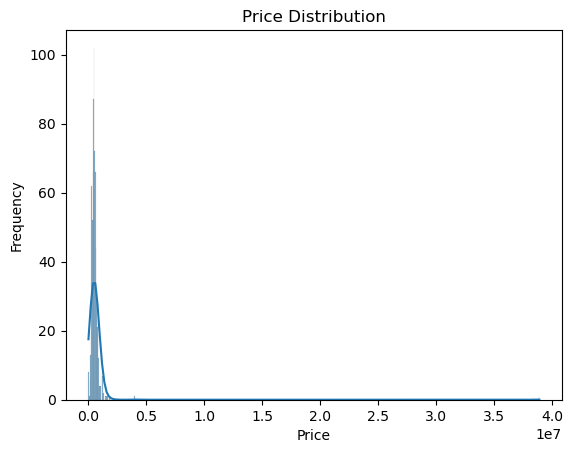

In [149]:
#Price Distribution - Plot Histogram to see the price distribution 
sns.histplot(cleaned_df['price'],kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [156]:
#Highest and Lowest Valued Property by City
highest_valued_city = cleaned_df.loc[cleaned_df['price'].idxmax()]['city']
print(f"The city with the highest valued property is:{highest_valued_city}")

lowest_valued_city = cleaned_df.loc[cleaned_df['price'].idxmin()]['city']
print(f"The city with the lowest valued property is:{lowest_valued_city}")

The city with the highest valued property is:Darwin City
The city with the lowest valued property is:Johnston


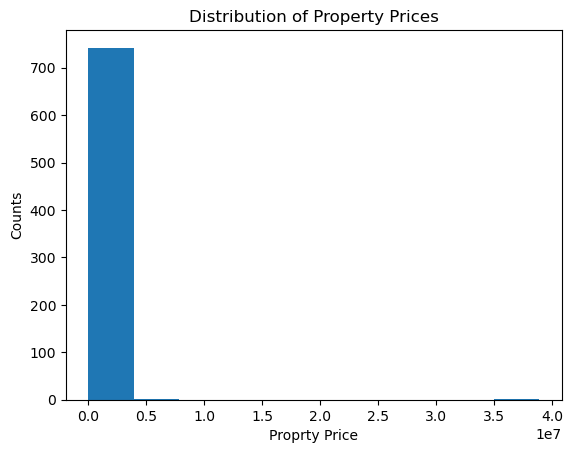

NormaltestResult(statistic=14.95102084770058, pvalue=0.0005667963873969128)


In [157]:
plt.hist(cleaned_df['price'], bins=10)
plt.title("Distribution of Property Prices")
plt.xlabel('Proprty Price')
plt.ylabel('Counts')
plt.show()
print(stats.normaltest(cleaned_df['price'].sample(50)))

*Obesrvation
The Histogram of the property prices is highly skewed to the left, indicating that the most properties are priced on the lower end, with the few property having very high prices. This skewness suggests a disparity in property prices.

Result of the Normality test,
The very low p-value (6.12 e-06) indicates that we reject the null hypothesis. This confirms that the property prices do not follow a normal distribution and are significantly skewed.

Outlier Analysis: Identifying and analyzing the outliers separately can provide insights into the factors contributing to the extremely high property values.


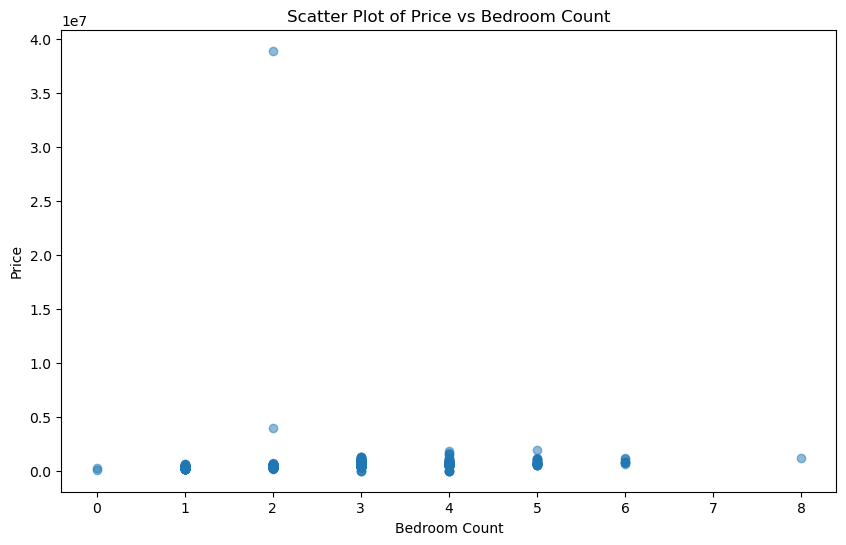

In [150]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['bedroom_count'], cleaned_df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Bedroom Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Price')
plt.show()

In [151]:
# Finding Outliers using IQR
Q1 = cleaned_df['price'].quantile(0.25)
Q3 = cleaned_df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = cleaned_df[(cleaned_df['price'] < (Q1 - 1.5 * IQR)) | (cleaned_df['price'] > (Q3 + 1.5 * IQR))]

# Define the lower bound and upper bound for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 42


Original data count: 744
Data count after removing outliers: 702


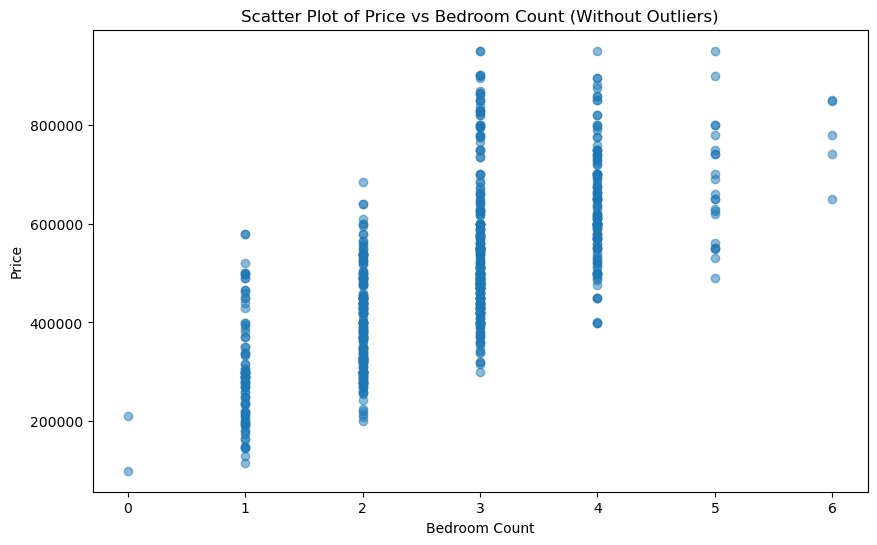

In [152]:
#Filter the Data to remove the outliers
df_no_outliers = cleaned_df[(cleaned_df['price'] >=lower_bound) & (cleaned_df['price'] <=upper_bound ) ]

# Display the number of records before and after removing outliers
print(f"Original data count: {len(cleaned_df)}")
print(f"Data count after removing outliers: {len(df_no_outliers)}")

# Redraw the scatter plot with the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['bedroom_count'], df_no_outliers['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Bedroom Count (Without Outliers)')
plt.xlabel('Bedroom Count')
plt.ylabel('Price')
plt.show()

*Removing Outliers
After removing outliers, the dataset becomes more representative of the typical property price.

In [159]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x, y, eqn_coordinates):
    r = stats.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

#Bedroom v/s Price Linear Regression Plot

In [160]:
df_no_outliers.columns

Index(['property_type', 'listing_agency', 'price', 'location_number', 'city',
       'zip_code', 'product_depth', 'bedroom_count', 'bathroom_count',
       'parking_count'],
      dtype='object')

The r-value is: 0.6934487592006107


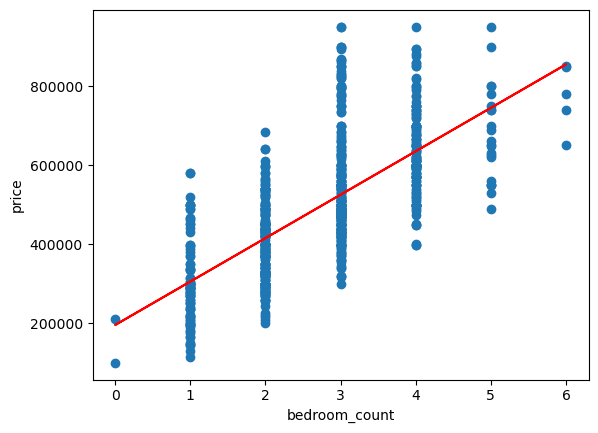

In [161]:
linear_regress_plot(df_no_outliers['bedroom_count'],df_no_outliers['price'],(9,10))

In [162]:
# Define a function to create Linear Regression plots
def linear_regression_plot(datasets):

    for index, (x, y, x_label, y_label, title_prefix) in enumerate(datasets):
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)

        # Create the regression line
        regress_values = slope * x + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create the scatter plot
        plt.figure(index)
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red',label=f'y={slope:.2f}x+{intercept:.2f}')
        #plt.annotate(line_eq,(9,-10),fontsize=14,color="red")
        
        # Add titles and labels
        plt.title(title_prefix)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        print(f"The r^2-value is: {r_value}")
        # Show all plots
        plt.show()

In [ ]:
linear_regress_plot()

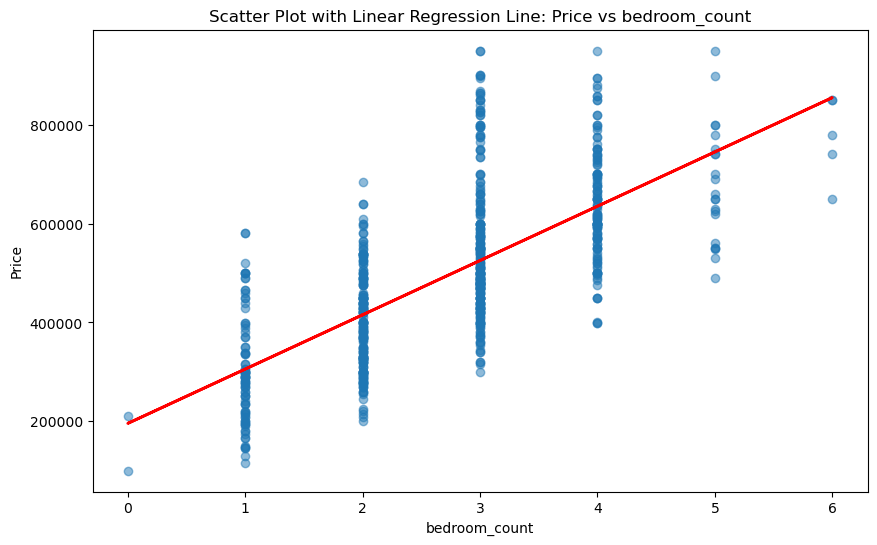

Linear Regression Equation for bedroom_count: y = 195430.08 + 109896.23 * bedroom_count


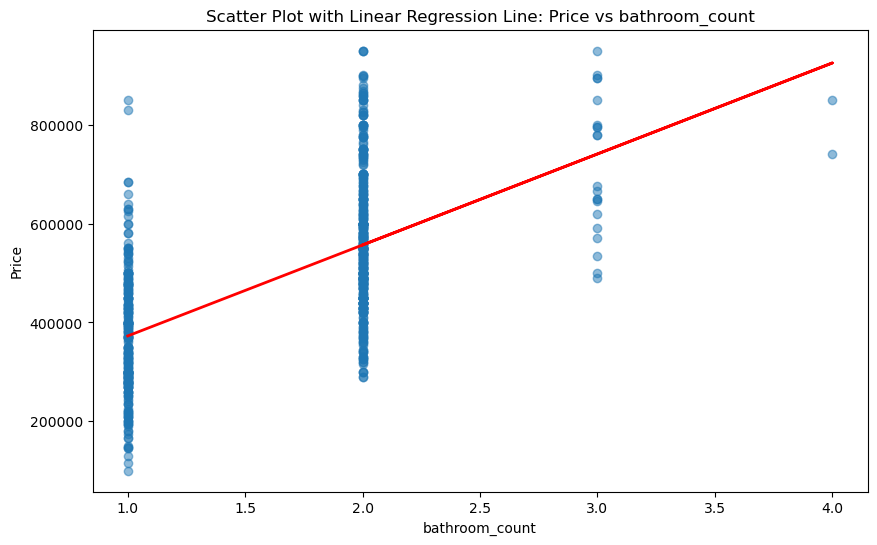

Linear Regression Equation for bathroom_count: y = 188292.79 + 184162.97 * bathroom_count


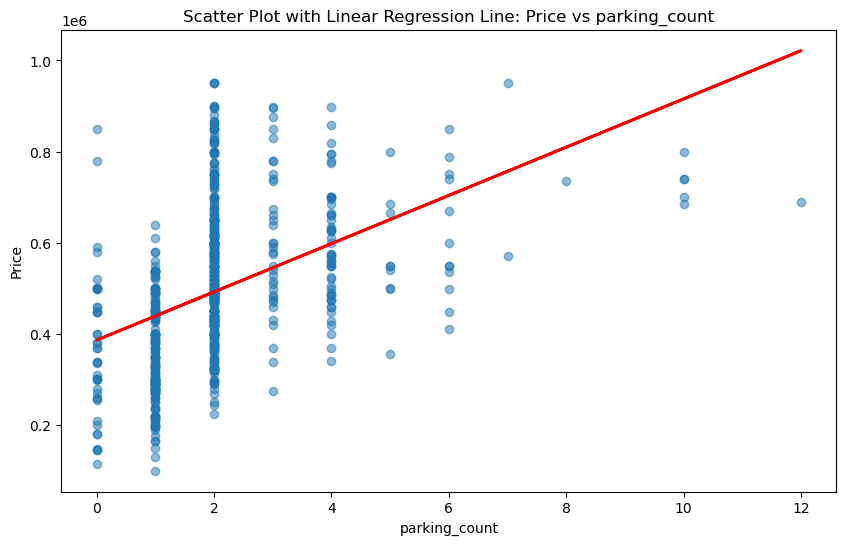

Linear Regression Equation for parking_count: y = 386281.40 + 52954.85 * parking_count


In [163]:
#Linear Regression Analysis
def linear_regression_analysis(feature):
    
    x = df_no_outliers[[feature]]
    y = df_no_outliers['price']
    
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, y_pred, color='red', linewidth=2)
    plt.title(f'Scatter Plot with Linear Regression Line: Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

    print(f"Linear Regression Equation for {feature}: y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * {feature}")

# Bedroom Count
linear_regression_analysis('bedroom_count')

# Bathroom Count
linear_regression_analysis('bathroom_count')

# Parking Count
linear_regression_analysis('parking_count')

In [ ]:
#Linear Regression Analysis
def linear_regression_analysis(feature):
    
    x = cleaned_df[[feature]]
    y = cleaned_df['price']
    
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, y_pred, color='red', linewidth=2)
    plt.title(f'Scatter Plot with Linear Regression Line: Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

    print(f"Linear Regression Equation for {feature}: y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * {feature}")

# Bedroom Count
linear_regression_analysis('bedroom_count')

# Bathroom Count
linear_regression_analysis('bathroom_count')

# Parking Count
linear_regression_analysis('parking_count')

#Count Unique values for each Proprty Type
cleaned_df['city'].value_counts()

In [ ]:
ax = cleaned_df['city'].value_counts()\
        .head()\
        .plot(kind='bar')
plt.show()